In [1]:
!pip install tqdm scipy

## Path planning (A* algorithm)

Path found:
[(8, 5), (7, 4), (7, 3), (6, 2), (5, 1), (4, 1), (3, 1), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
Number of operations: 53


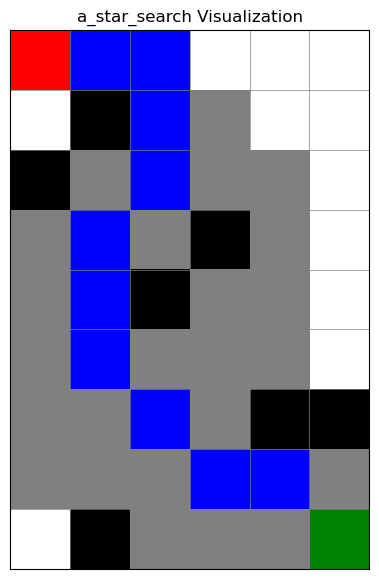

In [1]:
# Code from exercises week 5, modified A* algorithm, BoMR course

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from heapq import heappush, heappop # used if you want to use heap queue for priority queue (easier to implement) but not compulsory

def heuristic(a, b):
    # Implement the Euclidean distance heuristic
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def in_grid(grid, pos):
    return 0 <= pos[0] < grid.shape[0] and 0 <= pos[1] < grid.shape[1]

def is_obstacle(grid, pos):
    return not in_grid(grid, pos) or (grid[pos] == -1)
    

def a_star_search(map_grid, start, goal):
    # Initialize the open set as a priority queue and add the start node
    open_set = []
    heappush(open_set, (heuristic(start, goal), 0, start))  # (f_cost, g_cost, position)

    # Initialize the came_from dictionary
    came_from = {}
    # Initialize g_costs dictionary with default value of infinity and set g_costs[start] = 0
    g_costs = {start: 0}
    # Initialize the explored set
    explored = set()
    operation_count = 0

    while open_set:
        # Pop the node with the lowest f_cost from the open set
        current_f_cost, current_g_cost, current_pos = heappop(open_set)

        # Add the current node to the explored set
        explored.add(current_pos)

        # For directly reconstruct path
        if current_pos == goal:
            break
        
        up         = (current_pos[0] - 1, current_pos[1]    )
        down       = (current_pos[0] + 1, current_pos[1]    )  # Down
        left       = (current_pos[0]    , current_pos[1] - 1)  # Left
        right      = (current_pos[0]    , current_pos[1] + 1)  # Right
        up_left    = (current_pos[0] - 1, current_pos[1] - 1)  # Up Left
        down_right = (current_pos[0] + 1, current_pos[1] + 1)  # Down Right
        down_left  = (current_pos[0] + 1, current_pos[1] - 1)  # Down Left
        up_right   = (current_pos[0] - 1, current_pos[1] + 1)   # Up Right
        # Get the neighbors of the current node (up, down, left, right)
        neighbors = [up, down, left, right, up_left, down_right, down_left, up_right]
        
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, left) :
                neighbors.remove(up_left)
        
        if is_obstacle(map_grid, up) or is_obstacle(map_grid, right):
                neighbors.remove(up_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, right):
                neighbors.remove(down_right)
                
        if is_obstacle(map_grid, down) or is_obstacle(map_grid, left):
                neighbors.remove(down_left)
            
                
        for neighbor in neighbors:
            # Check if neighbor is within bounds and not an obstacle
            if (in_grid(map_grid,neighbor)) and map_grid[neighbor[0], neighbor[1]] != -1 and neighbor not in explored:
                # Calculate tentative_g_cost
                tentative_g_cost = current_g_cost + heuristic(current_pos, neighbor)
                
                # If this path to neighbor is better than any previous one
                if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                    # Update came_from, g_costs, and f_cost
                    came_from[neighbor] = current_pos
                    g_costs[neighbor] = tentative_g_cost
                    f_cost = tentative_g_cost + heuristic(neighbor, goal)

                    # Add neighbor to open set
                    heappush(open_set, (f_cost, tentative_g_cost, neighbor))
                    operation_count += 1

    # Reconstruct path
    if current_pos == goal:
        path = []
        while current_pos in came_from:
            path.append(current_pos)
            current_pos = came_from[current_pos]
        path.append(start)
        return path[::-1], explored,operation_count
    else:
        # If we reach here, no path was found
        return None, explored,operation_count
    
    
##############################################
#do not modify this code
##############################################
def display_map(map_grid, path, start, goal, explored):
    cmap = ListedColormap(['white', 'black', 'blue', 'green', 'red', 'grey'])
    map_display = np.zeros_like(map_grid, dtype=object)

    # Assign colors based on the map grid values
    map_display[map_grid == -1] = 'black'  # Obstacles
    map_display[map_grid == 0] = 'white'   # Free space

    for position in explored:
        if map_display[tuple(position)] == 'white':
            map_display[tuple(position)] = 'grey'  # Explored cells

    # Visualize the path
    for position in path:
        if map_display[position[0], position[1]] in ['white', 'grey']:
            map_display[position[0], position[1]] = 'blue'  # Path

    map_display[start[0], start[1]] = 'green'  # Start
    map_display[goal[0], goal[1]] = 'red'      # Goal

    # Convert color names to numbers for plotting
    color_mapping = {'white': 0, 'black': 1, 'blue': 2, 'green': 3, 'red': 4, 'grey': 5, 'yellow': 6}
    map_numeric_display = np.vectorize(color_mapping.get)(map_display)
    fig, ax = plt.subplots(figsize=(6, 7))
    ax.imshow(map_numeric_display, cmap=cmap)
    ax.set_xticks(np.arange(-0.5, map_grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, map_grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title('a_star_search Visualization')
    plt.show()

map_height = 9
map_width = 6
Map = np.zeros((map_height, map_width))



Map[8, 1] = -1; Map[6, 4:6] = -1; Map[4, 2:3] = -1; Map[3, 3] = -1; Map[1, 1] = -1; Map[2, 0] = -1

SearchStart =  (8, 5)
SearchGoal  =  (0, 0)

path, explored, operation_count = a_star_search(Map, SearchStart, SearchGoal)

# Display the result
if path:
    print("Path found:")
    print(path)
    print(f"Number of operations: {operation_count}")
    display_map(Map, path, SearchStart, SearchGoal, explored)
else:
    print("No path found.")


## Open Loop Control for testing

In [2]:
directions = [
    'N',   # North
    'NE',  # Northeast
    'E',   # East
    'SE',  # Southeast
    'S',   # South
    'SW',  # Southwest
    'W',   # West
    'NW'  # Northwest
]

orientation = 0 # Suppose Thymio is initially pointing North

def step_to_direction(step):
    if step[0] == 1:
        if step[1] == 1:
            return 3
        
        if step[1] == -1:
            return 5
        
        return 4
    
    if step[0] == -1:
        if step[1] == 1:
            return 1
        
        if step[1] == -1:
            return 7
        
        return 0
    
    if step[1] == 1:
        return 2
    
    return 6

path_directions = []
for i in range(len(path)-1):
    step = (path[i+1][0] - path[i][0], path[i+1][1] - path[i][1])
    path_directions.append(step_to_direction(step))

print("Directions to follow from A*: ")
for direction in path_directions:
    print(directions[direction])

Directions to follow from A*: 
NW
W
NW
NW
N
N
NE
N
N
W
W


In [4]:
orientation = 0
for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    orientation = direction
    print("# of 45 ° rots.: ", rotation, ",   rot. dir.: ", rotation_direction)
    

# of 45 ° rots.:  1 ,   rot. dir.:  -1
# of 45 ° rots.:  1 ,   rot. dir.:  -1
# of 45 ° rots.:  1 ,   rot. dir.:  1
# of 45 ° rots.:  0 ,   rot. dir.:  0
# of 45 ° rots.:  1 ,   rot. dir.:  1
# of 45 ° rots.:  0 ,   rot. dir.:  0
# of 45 ° rots.:  1 ,   rot. dir.:  1
# of 45 ° rots.:  1 ,   rot. dir.:  -1
# of 45 ° rots.:  0 ,   rot. dir.:  0
# of 45 ° rots.:  2 ,   rot. dir.:  -1
# of 45 ° rots.:  0 ,   rot. dir.:  0


In [29]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 608f09df-b044-4573-8414-efa666631e72

In [4]:
def motors(left, right):
    # Function from exercises week 8, BoMR course
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }


In [6]:
orientation = 0

for direction in path_directions:
    rotation = direction - orientation
    if rotation > 4:
        rotation -= 8
    if rotation < -3:
        rotation += 8
    rotation_direction = np.sign(rotation)
    rotation = abs(rotation)
    diag_factor = 1 
    if not (direction % 2):
        diag_factor = np.sqrt(2)
        
    
    if rotation != 0:
        node.send_set_variables(motors(100*rotation_direction, -100*rotation_direction))
        await client.sleep(1.17 * rotation)
        orientation = direction
    node.send_set_variables(motors(100, 100))
    
    await client.sleep(1*diag_factor)
node.send_set_variables(motors(0, 0))


NameError: name 'node' is not defined

In [30]:
node.send_set_variables(motors(100, 100))

In [31]:
node.send_set_variables(motors(0, 0))

## PID Control simulation

In [7]:
def goal_list_from_path(path):
    
    goal_list = path.copy()
    
    popped = 0
    
    for i in range(len(path)-2):
        if (path[i+1][0] - path[i][0] == path[i+2][0] - path[i+1][0]) and (path[i+1][1] - path[i][1] == path[i+2][1] - path[i+1][1]):
            goal_list.pop(i+1 - popped)
            popped += 1
            
    return goal_list

goal_list = goal_list_from_path(path)

print("A* path:           ", path)
print("Reduced goal list: ", goal_list)

A* path:            [(8, 5), (7, 4), (7, 3), (6, 2), (5, 1), (4, 1), (3, 1), (2, 2), (1, 2), (0, 2), (0, 1), (0, 0)]
Reduced goal list:  [(8, 5), (7, 4), (7, 3), (5, 1), (3, 1), (2, 2), (0, 2), (0, 0)]


In [8]:
# from exercises 8 BoMR (to use when testing PID on thymio)

from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False


In [9]:
# from https://felipenmartins.github.io/Robotics-Simulation-Labs/Lab4/
import numpy as np

async def get_pose_error(xd, yd, x, y, phi):
    """ Returns the position and orientation errors. 
        Orientation error is bounded between -pi and +pi radians.
    """
    # Position error:
    x_err = xd - x
    y_err = yd - y
    dist_err = np.sqrt(x_err**2 + y_err**2)

    # Orientation error
    phi_d = np.arctan2(y_err,x_err)
    phi_err = phi_d - phi

    # Limits the error to (-pi, pi):
    phi_err_correct = np.arctan2(np.sin(phi_err),np.cos(phi_err))

    return dist_err, phi_err_correct

In [10]:
# from https://felipenmartins.github.io/Robotics-Simulation-Labs/Lab4/
async def pid_controller(e, e_prev, e_acc, delta_t, kp=1.0, kd=0, ki=0):
    """ PID algortithm: must be executed every delta_t seconds
    The error e must be calculated as: e = desired_value - actual_value
    e_prev contains the error calculated in the previous step.
    e_acc contains the integration (accumulation) term.
    """
    P = kp*e                      # Proportional term; kp is the proportional gain
    I = e_acc + ki*e*delta_t      # Intergral term; ki is the integral gain
    D = kd*(e - e_prev)/delta_t   # Derivative term; kd is the derivative gain

    output = P + I + D              # controller output

    # store values for the next iteration
    e_prev = e     # error value in the previous interation (to calculate the derivative term)
    e_acc = I      # accumulated error value (to calculate the integral term)

    return output, e_prev, e_acc

In [11]:
async def wheel_speed_commands(u_d, w_d, d, r):
    """Convert desired robot speeds to desired wheel speeds"""
    wr_d = float((2 * u_d - d * w_d) / (2 * r))
    wl_d = float((2 * u_d + d * w_d) / (2 * r))
    
    # If saturated, correct speeds to keep the original turning ratio
    #if np.abs(wl_d) > MAX_SPEED or np.abs(wr_d) > MAX_SPEED:
     #   speed_ratio = np.abs(wr_d)/np.abs(wl_d)
      #  if speed_ratio > 1:
       #     wr_d = np.sign(wr_d)*MAX_SPEED
        #    wl_d = np.sign(wl_d)*MAX_SPEED/speed_ratio
        #else:
         #   wl_d = np.sign(wl_d)*MAX_SPEED
          #  wr_d = np.sign(wr_d)*MAX_SPEED*speed_ratio
        
    return wl_d, wr_d

In [12]:
async def update_odometry(x, y, phi, wl, wr, d, r, delta_t):
    # Update robot's position and orientation using odometry
    forward_speed = (wr + wl) * r / 2
    angular_speed = (wl - wr) * r / d

    x += forward_speed * np.cos(phi) * delta_t / 14
    y += forward_speed * np.sin(phi) * delta_t / 14
    phi += angular_speed * delta_t

    # Keep phi within (-pi, pi)
    phi = np.arctan2(np.sin(phi), np.cos(phi))

    return x, y, phi


In [42]:
import time
# Control loop

async def main_control_loop(goal_list):
    """
    Main control loop to follow global navigation path with continuous obstacle checking.
    """

    # Constant forward speed
    u_const = 4  # cm/s (adjust based on your robot's speed capabilities)

    # Robot geometric parameters
    base_width = 9.4   # cm
    wheel_radius = 2.2 # cm

    # Speed constant (convert thymio motor speed to forward speed)
    speed_constant = 0.033615 # cm/s

    # Time step
    delta_t = 0.2  # seconds

    # Initial errors for PID
    phi_err_prev = 0
    phi_err_acc = 0

    # Initial robot position and orientation
    x, y = goal_list[0][1], goal_list[0][0]
    phi = -np.pi/2  # Initial orientation, point£ing north

    # Start with the first goal
    next_goal = 1
    x_goal = goal_list[next_goal][1]
    y_goal = goal_list[next_goal][0]

    control_x = [x]
    control_y = [y]
    it = 0

    while next_goal < len(goal_list):

        # determine if obstacle 
        state = await check_obstacles(proximity_threshold=2000)

        if state == 0:

            it += 1
            print("iteration", it)
            # Calculate pose error
            _, phi_err = await get_pose_error(x_goal, y_goal, x, y, phi)
            print("pose error", _, phi_err)
            # Update orientation PID
            phi_control, phi_err_prev, phi_err_acc = await pid_controller(
                phi_err, phi_err_prev, phi_err_acc, delta_t, kp=1, kd=0.05, ki=0.00)

            # Map control outputs to desired forward and angular speeds
            u_d = u_const  # Constant forward speed
            w_d = phi_control  # Angular speed from PID

            # Compute wheel speed commands
            left_speed, right_speed = await wheel_speed_commands(u_d, w_d, base_width, wheel_radius)

            # Simulate robot motion using odometry
                    # DEBUG
            print("predicted x: ", x)
            print("predicted y: ", y)
            print("goal x: ", x_goal)
            print("goal y: ", y_goal)

            

            # Scale to motor commands
            left_speed *= wheel_radius / speed_constant
            right_speed *= wheel_radius / speed_constant

            node.send_set_variables(motors(int(left_speed), int(right_speed)))

            print("left and right speeds", int(left_speed), int(right_speed))

            # Check if goal is reached
            dist_to_goal = np.sqrt((x_goal - x)**2 + (y_goal - y)**2)*14
            if dist_to_goal < 3:  # 3 cm tolerance
                print(" ")
                print('******************************* goal reached *******************************')
                next_goal += 1
                if next_goal < len(goal_list):
                    x_goal = goal_list[next_goal][1]
                    y_goal = goal_list[next_goal][0]

            print(" ")

            # Wait for the next iteration (optional for simulation)
        elif state == 1:
            print("Obstacle detected - obstacle avoidance")
            left_speed, right_speed = await obstacle_avoidance()
            print("Obstacle detected - obstacle avoidance")
        
        left_speed *=  speed_constant / wheel_radius
        right_speed *= speed_constant / wheel_radius
        
        x, y, phi = await update_odometry(x, y, phi, left_speed, right_speed, base_width, wheel_radius, delta_t)

        control_x.append(x)
        control_y.append(y)
        
        
        time.sleep(delta_t)

    left_speed = 0
    right_speed = 0
    node.send_set_variables(motors(int(left_speed), int(right_speed)))

    return control_x, control_y
    

In [43]:
control_x, control_y = await main_control_loop(goal_list)

iteration 1
pose error 1.4142135623730951 -0.7853981633974483
predicted x:  5
predicted y:  8
goal x:  4
goal y:  7
left and right speeds -18 256
 
iteration 2
pose error 1.3744015395206508 -0.6184519107520912
predicted x:  5.0
predicted y:  7.942857142857143
goal x:  4
goal y:  7
left and right speeds 38 199
 
iteration 3
pose error 1.3282560909656538 -0.5280538862905297
predicted x:  4.988851981599078
predicted y:  7.886812269691244
goal x:  4
goal y:  7
left and right speeds 48 189
 
iteration 4
pose error 1.279220754263949 -0.4494720622677921
predicted x:  4.971327974264119
predicted y:  7.83242279194625
goal x:  4
goal y:  7
left and right speeds 58 179
 
iteration 5
pose error 1.2280045333972798 -0.38372628946869725
predicted x:  4.948404512900873
predicted y:  7.780079492073423
goal x:  4
goal y:  7
left and right speeds 67 170
 
iteration 6
pose error 1.1752120624455389 -0.3284728906714731
predicted x:  4.921071533527098
predicted y:  7.729897679023257
goal x:  4
goal y:  7
lef

iteration 46
pose error 2.7251046739195703 0.39653697894469175
predicted x:  2.9201946487807136
predicted y:  6.933661809782724
goal x:  1
goal y:  5
left and right speeds 171 66
 
iteration 47
pose error 2.6724870037857644 0.3295354334670608
predicted x:  2.867394025361244
predicted y:  6.911812318050321
goal x:  1
goal y:  5
left and right speeds 162 75
 
iteration 48
pose error 2.6184841392488942 0.2740404419705582
predicted x:  2.8163857026515635
predicted y:  6.886054656339791
goal x:  1
goal y:  5
left and right speeds 155 82
 
iteration 49
pose error 2.5635201931013825 0.22803954359533485
predicted x:  2.7670874263970746
predicted y:  6.857158530634343
goal x:  1
goal y:  5
left and right speeds 149 88
 
iteration 50
pose error 2.5078899520187683 0.1898827204862159
predicted x:  2.719358755364803
predicted y:  6.82573751722067
goal x:  1
goal y:  5
left and right speeds 144 93
 
iteration 51
pose error 2.4517978812882597 0.15821298964728794
predicted x:  2.673035188231388
predic

iteration 91
pose error 0.16850619468248867 0.0008160758026041216
predicted x:  1.1114458813360264
predicted y:  5.126388896583557
goal x:  1
goal y:  5
left and right speeds 119 118
 
******************************* goal reached *******************************
 
iteration 92
pose error 2.0848596333539935 0.6879810782472611
predicted x:  1.0736180267086928
predicted y:  5.083559472857078
goal x:  1
goal y:  3
left and right speeds 239 -1
 
iteration 93
pose error 2.0410376359804023 0.5338050276034552
predicted x:  1.0357973730524714
predicted y:  5.040723690157737
goal x:  1
goal y:  3
left and right speeds 188 49
 
iteration 94
pose error 1.9920568426964633 0.44934881503410384
predicted x:  1.005864048599985
predicted y:  4.992048211632394
goal x:  1
goal y:  3
left and right speeds 178 59
 
iteration 95
pose error 1.9407452861701162 0.3764919690649422
predicted x:  0.9808909802812161
predicted y:  4.940651208011608
goal x:  1
goal y:  3
left and right speeds 169 68
 
iteration 96
pos

iteration 136
pose error 1.036757362579268 0.1422708690118062
predicted x:  1.2116472176401822
predicted y:  2.6733243790387022
goal x:  2
goal y:  2
left and right speeds 138 99
 
iteration 137
pose error 0.9802253318334738 0.12321195974428711
predicted x:  1.249397673188804
predicted y:  2.630426719098788
goal x:  2
goal y:  2
left and right speeds 135 102
 
iteration 138
pose error 0.9235423768330325 0.10712687497566076
predicted x:  1.2883060616131354
predicted y:  2.5885764690078945
goal x:  2
goal y:  2
left and right speeds 133 104
 
iteration 139
pose error 0.8667486315376228 0.0935549541603925
predicted x:  1.3281948495856035
predicted y:  2.547659593314161
goal x:  2
goal y:  2
left and right speeds 131 106
 
iteration 140
pose error 0.8098732576374307 0.08211401167063082
predicted x:  1.3689188489293052
predicted y:  2.5075739100855667
goal x:  2
goal y:  2
left and right speeds 130 107
 
iteration 141
pose error 0.7529375292088345 0.07248819285523977
predicted x:  1.4103590

iteration 181
pose error 0.4810538925183982 -0.010630670929572037
predicted x:  2.057516979713792
predicted y:  0.47760301983101594
goal x:  2
goal y:  0
left and right speeds 117 120
 
iteration 182
pose error 0.4239146994673685 -0.00998145177884835
predicted x:  2.0512882050978947
predicted y:  0.42080065641862496
goal x:  2
goal y:  0
left and right speeds 117 120
 
iteration 183
pose error 0.36677513232768993 -0.00957268809204459
predicted x:  2.0449411709886736
predicted y:  0.3640113855968811
goal x:  2
goal y:  0
left and right speeds 117 120
 
iteration 184
pose error 0.3096353765145432 -0.009445191313296688
predicted x:  2.0384826247506576
predicted y:  0.3072346887667521
goal x:  2
goal y:  0
left and right speeds 117 120
 
iteration 185
pose error 0.2524956450884002 -0.009700060217257667
predicted x:  2.0319165494529874
predicted y:  0.25047032690445065
goal x:  2
goal y:  0
left and right speeds 117 120
 
iteration 186
pose error 0.19535626256964056 -0.010584588772710292
pr

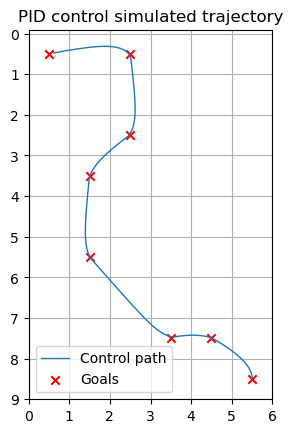

In [44]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.gca()
ax.invert_yaxis()
ax.set_aspect('equal', adjustable='box')

ct_x = control_x.copy()
ct_y = control_y.copy()

for i in range(len(control_x)):
    ct_x[i] += 0.5
    ct_y[i] += 0.5
    
plt.plot(ct_x, ct_y, linewidth = 1)

x_goals = []
y_goals = []

for goal in goal_list:
    x_goals.append(goal[1]+0.5)
    y_goals.append(goal[0]+0.5)
    
plt.scatter(x_goals, y_goals, color="r", marker="x")

ax.legend(['Control path', 'Goals'])
plt.title("PID control simulated trajectory")

plt.xticks(np.arange(0, 7, step=1))
plt.yticks(np.arange(0, 10, step=1))
plt.grid()

plt.savefig('motion_control.png', dpi=400)
plt.show()

In [34]:
async def print_sensor_values(sensor_id, print_range=2, delta_time=0.2):
    """
    Print the sensor value sensor_id print_range times, every delta_time seconds
    """
    await node.wait_for_variables({str(sensor_id)})
    for i in range(print_range):
        print(list(node[sensor_id]))
        await client.sleep(delta_time)
        
await print_sensor_values('prox.ground.reflected')

[958, 676]
[958, 676]


In [35]:
async def check_obstacles(proximity_threshold=2000):
    horizontal_sensor_values = await get_sensor_values('prox.horizontal')
    if any(x > proximity_threshold for x in horizontal_sensor_values):
        return 1  # Obstacle detected
    return 0  # No obstacle

In [36]:
async def get_sensor_values(sensor_id, delay=0.01):
    """
    Get the current sensor values for sensor_id and store them in a list.
    """
    await client.sleep(delay)  # Allow some time for the sensor values to update
    sensor_values = list(node[sensor_id])  # Directly retrieve the current values

    return sensor_values  # Return the collected sensor values as a list

# Call the function to get the horizontal sensor values
horizontal_sensor_values = await get_sensor_values('prox.horizontal')

In [39]:
async def obstacle_avoidance(left_output=0, right_output=0):
    """
    Implements obstacle avoidance based on proximity sensor values.
    """
    # Define weights for left and right motors
    w_l = [40, 20, -20, -20, -40, 30, -10]
    w_r = [-40, -20, -20, 20, 40, -10, 30]

    # Scale factors for sensors and constant factor
    sensor_scale = 500
    
    # Read proximity sensor values
    prox_values = list(node['prox.horizontal'])
    
    # Compute motor outputs based on the scaled sensor values
    for i in range(len(prox_values)):
        # Scale the sensor readings
        scaled_value = prox_values[i] // sensor_scale
        
        # Update outputs for left and right motors
        left_output += scaled_value * w_l[i] // 3
        right_output += scaled_value * w_r[i] // 3

    # Set motor powers
    await node.set_variables(motors(left_output, right_output))
    print(f"Left Motor: {left_output}, Right Motor: {right_output}")
    
    return left_output, right_output